In [3]:
library(dplyr)
library(DataExplorer)

Warning message:
"pakiet 'DataExplorer' został zbudowany w wersji R 4.2.3"


In [26]:
data <- read.csv(file="data\\adult.data", stringsAsFactors = TRUE, col.names=c("age", "workclass", "fnlwgt", "education", 
                                                       "education.num","marital.status", "occupation", "relationship", "race","sex",
                                                       "capital.gain", "capital.loss", "hours.per.week","native.country", "income"))

In [27]:
data %>% sample_n(5)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
29,Private,304595,Masters,14,Never-married,Sales,Not-in-family,White,Male,0,0,50,United-States,>50K
48,Private,148254,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Wife,White,Female,0,0,16,United-States,>50K
54,Private,145714,HS-grad,9,Married-civ-spouse,Tech-support,Husband,White,Male,7688,0,25,United-States,>50K
53,Private,137192,Bachelors,13,Divorced,Exec-managerial,Unmarried,Asian-Pac-Islander,Male,0,0,50,United-States,<=50K
54,Self-emp-not-inc,109413,Bachelors,13,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [28]:
# which columns have '?' values
columns_with_question <- names(data)[sapply(data, function(col) any(col == " ?"))]

In [29]:
columns_with_question

[1] "workclass"      "occupation"     "native.country"

In [30]:
columns_with_question <- sapply(data, function(col) sum(col == ' ?') > 0)

In [31]:
for (column in names(data)[columns_with_question]) {
  data[data[[column]] == ' ?', column] <- NA
}

In [32]:
data %>% sample_n(10)

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
42,State-gov,222884,Bachelors,13,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
48,Private,126754,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,40,United-States,>50K
34,Private,143083,Assoc-voc,11,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,18,United-States,<=50K
27,Private,491421,5th-6th,3,Never-married,Farming-fishing,Unmarried,White,Male,0,0,50,United-States,<=50K
46,Private,358585,Some-college,10,Divorced,Craft-repair,Unmarried,White,Male,0,0,40,United-States,>50K
25,Private,161007,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
29,Private,228075,HS-grad,9,Never-married,Adm-clerical,Unmarried,White,Male,0,0,35,Mexico,<=50K
49,Private,167523,Bachelors,13,Divorced,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
47,Private,185041,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,7298,0,40,United-States,>50K


In [33]:
names(data)[sapply(data, function(col) any(col == " ?"))]

[1] NA NA NA

In [34]:
# Missing observations?
sum(is.na(data))

#WE NEED TO FIND A METHOD TO FILL THE NANS 

[1] 4262

In [35]:
summary(age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  17.00   28.00   37.00   38.58   48.00   90.00 

In [36]:
summary(capital.gain)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0    1078       0   99999 

In [37]:
summary(capital.loss)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    0.00   87.31    0.00 4356.00 

In [38]:
summary(hours.per.week)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   40.00   40.00   40.44   45.00   99.00 

In [39]:
table(workclass)
table(education)
table(marital.status)
table(occupation)
table(relationship)
table(race)
table(sex)
table(income)
table(native.country)

workclass
                ?       Federal-gov         Local-gov      Never-worked 
             1836               960              2093                 7 
          Private      Self-emp-inc  Self-emp-not-inc         State-gov 
            22696              1116              2541              1297 
      Without-pay 
               14 

education
         10th          11th          12th       1st-4th       5th-6th 
          933          1175           433           168           333 
      7th-8th           9th    Assoc-acdm     Assoc-voc     Bachelors 
          646           514          1067          1382          5354 
    Doctorate       HS-grad       Masters     Preschool   Prof-school 
          413         10501          1723            51           576 
 Some-college 
         7291 

marital.status
              Divorced      Married-AF-spouse     Married-civ-spouse 
                  4443                     23                  14976 
 Married-spouse-absent          Never-married              Separated 
                   418                  10682                   1025 
               Widowed 
                   993 

occupation
                 ?       Adm-clerical       Armed-Forces       Craft-repair 
              1843               3769                  9               4099 
   Exec-managerial    Farming-fishing  Handlers-cleaners  Machine-op-inspct 
              4066                994               1370               2002 
     Other-service    Priv-house-serv     Prof-specialty    Protective-serv 
              3295                149               4140                649 
             Sales       Tech-support   Transport-moving 
              3650                928               1597 

relationship
        Husband   Not-in-family  Other-relative       Own-child       Unmarried 
          13193            8304             981            5068            3446 
           Wife 
           1568 

race
 Amer-Indian-Eskimo  Asian-Pac-Islander               Black               Other 
                311                1039                3124                 271 
              White 
              27815 

sex
 Female    Male 
  10771   21789 

income
 <=50K   >50K 
 24719   7841 

native.country
                          ?                    Cambodia 
                        583                          19 
                     Canada                       China 
                        121                          75 
                   Columbia                        Cuba 
                         59                          95 
         Dominican-Republic                     Ecuador 
                         70                          28 
                El-Salvador                     England 
                        106                          90 
                     France                     Germany 
                         29                         137 
                     Greece                   Guatemala 
                         29                          64 
                      Haiti          Holand-Netherlands 
                         44                           1 
                   Honduras                        Hong 
                

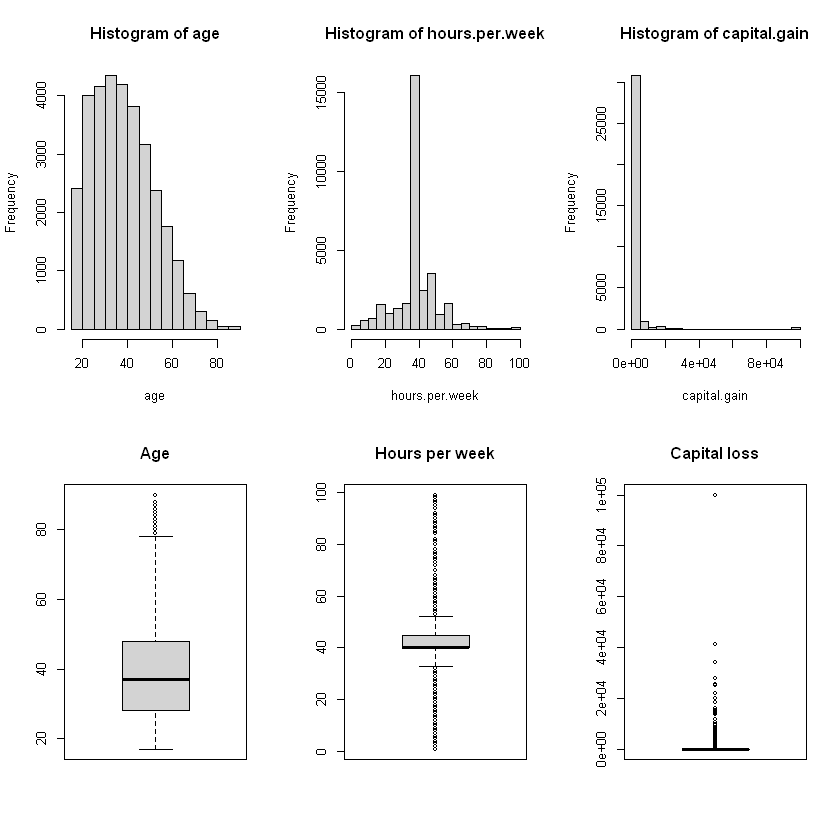

In [40]:
par(mfrow=c(2,3))
hist(age)
hist(hours.per.week)
hist(capital.gain)
boxplot(age, main="Age")
boxplot(hours.per.week, main="Hours per week")
boxplot(capital.gain, main="Capital loss")
par(mfrow=c(1,1))

In [44]:
#liczbę unikalnych wartości w każdej kolumnie 
result <- sapply(data, function(x) n_distinct(x))
result

age      workclass         fnlwgt      education  education.num 
            73              9          21647             16             16 
marital.status     occupation   relationship           race            sex 
             7             15              6              5              2 
  capital.gain   capital.loss hours.per.week native.country         income 
           119             92             94             42              2

In [46]:
data

age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
<int>,<fct>,<int>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
